In [14]:
# Assignment – Data Pre‑processing & Early Data Analysis


In [15]:
## Part 1 – Data Pre‑processing & Early Data Analysis (EDA)

In [16]:
### Question A
From the [scikit‑learn link](https://scikit-learn.org/1.0/modules/generated/sklearn.datasets.load_boston.html) load the *Boston Housing* dataset, handle any missing values, and visualise key features.


SyntaxError: invalid character '‑' (U+2011) (ipython-input-16-4261572895.py, line 2)

In [21]:
# --- A.1  Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_openml  # works in Colab

# --- A.2  Load the Boston Housing dataset from OpenML
housing = fetch_openml(name="boston", version=1, as_frame=True)  # returns a Bunch
df = housing.frame.copy()                                       # 506 × 14 (13 features + target)



In [22]:
# Check for missing values
print("Missing values in each column:")
print(df.isnull().sum())


Missing values in each column:
CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64


In [23]:
# Descriptive statistics of the dataset
df.describe()



,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


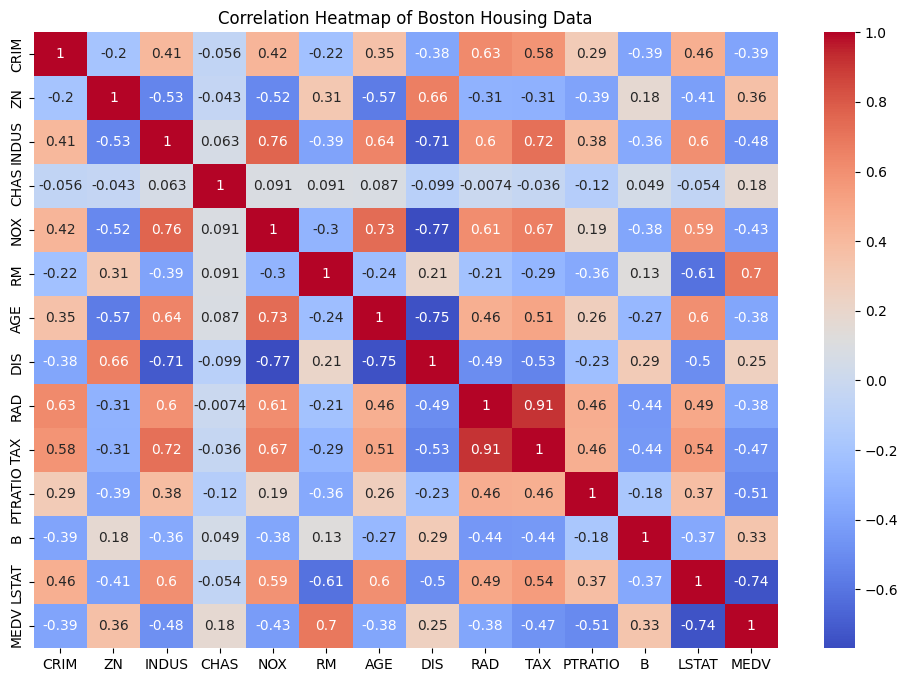

In [24]:
# Correlation heatmap of features
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Boston Housing Data")
plt.show()


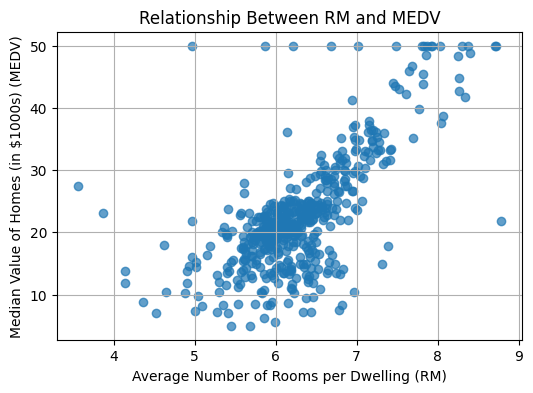

In [25]:
# Scatter plot between RM (average rooms) and MEDV (target)
plt.figure(figsize=(6, 4))
plt.scatter(df['RM'], df['MEDV'], alpha=0.7)
plt.xlabel("Average Number of Rooms per Dwelling (RM)")
plt.ylabel("Median Value of Homes (in $1000s) (MEDV)")
plt.title("Relationship Between RM and MEDV")
plt.grid(True)
plt.show()


In [26]:
### Question B
Apply feature scaling and one‑hot encoding.


SyntaxError: invalid character '‑' (U+2011) (ipython-input-26-607392794.py, line 2)

In [27]:
# Import preprocessing tools
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline


In [28]:
# Separate features and target variable
X = df.drop(columns=['MEDV'])
y = df['MEDV']

In [29]:
# Identify categorical and numerical columns
categorical_features = ['CHAS']                     # Treat 'CHAS' as categorical
numerical_features = X.columns.tolist()
numerical_features.remove('CHAS')                   # Remove CHAS from numerical


In [30]:
# Define preprocessing pipeline for numeric features
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  # Impute missing values with median
    ('scaler', StandardScaler())                    # Standardize the features
])


In [31]:
# Define preprocessing pipeline for categorical features
categorical_transformer = Pipeline(steps=[
    ('encoder', OneHotEncoder(drop='first'))        # One-hot encode CHAS
])


In [32]:
# Combine both transformers using ColumnTransformer
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])


In [33]:
# Fit and transform the data
X_preprocessed = preprocessor.fit_transform(X)

# Get encoded feature names
encoded_cat_names = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)

# Combine all feature names
feature_names = numerical_features + encoded_cat_names.tolist()

# Create DataFrame from transformed data
X_preprocessed_df = pd.DataFrame(X_preprocessed, columns=feature_names)

# Show first 5 rows of the processed data
X_preprocessed_df.head()


,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CHAS_1
0,-0.419782,0.284830,-1.287909,-0.144217,0.413672,-0.120013,0.140214,-0.982843,-0.666608,-1.459000,0.441052,-1.075562,0.0
1,-0.417339,-0.487722,-0.593381,-0.740262,0.194274,0.367166,0.557160,-0.867883,-0.987329,-0.303094,0.441052,-0.492439,0.0
2,-0.417342,-0.487722,-0.593381,-0.740262,1.282714,-0.265812,0.557160,-0.867883,-0.987329,-0.303094,0.396427,-1.208727,0.0
3,-0.416750,-0.487722,-1.306878,-0.835284,1.016303,-0.809889,1.077737,-0.752922,-1.106115,0.113032,0.416163,-1.361517,0.0
4,-0.412482,-0.487722,-1.306878,-0.835284,1.228577,-0.511180,1.077737,-0.752922,-1.106115,0.113032,0.441052,-1.026501,0.0


In [34]:
#### Why each step?

* **fetch_openml()** – replaces deprecated `load_boston()`; pulls dataset from OpenML.
* **SimpleImputer(strategy="median")** – robust to outliers, ensures no missing values during modelling.
* **StandardScaler()** – centers & scales numeric features (mean 0, std 1) for fair distance metrics & faster convergence.
* **OneHotEncoder(drop="first")** – converts `CHAS` binary column into one dummy column, avoiding multicollinearity.
* **Pipeline / ColumnTransformer** – keeps all preprocessing steps in one reusable object, critical for cross‑validation.


SyntaxError: invalid character '–' (U+2013) (ipython-input-34-402575514.py, line 3)